In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm
from IPython import display
from scipy.io import wavfile
from tensorflow.keras import layers
from tensorflow import keras
import processing as pr

/tmp/ipykernel_3338843/1428232884.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU만 사용하도록 제한
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)

2022-04-26 11:35:46.540689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 11:35:46.541227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 11:35:46.545243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 11:35:46.545766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 11:35:46.546338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [3]:
#data
model_name = "SMD"

In [4]:
train_set, test_set, label_set = pr.SMD()

In [5]:
if model_name == "SMD" or model_name == "SWaT":
    print("yes")
    train_set, test_set = pr.min_max(train_set, test_set)

yes


In [6]:
if model_name == "SMD" or model_name == "SWaT":
    train_set = pr.window_nonoverlap(train_set,100)
    test_copy = np.copy(test_set)
    test_set = pr.window_nonoverlap(test_set,100)
    label_set = pr.label_window(label_set,100)
else:
    train_set = pr.window_overlap(train_set,100)
    test_copy = np.copy(test_set)
    test_set = pr.window_overlap(test_set,100)

In [7]:
train_set.shape

(7084, 100, 38)

In [8]:
#하이퍼파라미터
time_steps = train_set.shape[1]
in_channels = train_set.shape[-1]
batch_size = 128

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(in_channels*2//3, kernel_size=2, padding='valid', strides=2, activation='relu'))
model.add(tf.keras.layers.Conv1D(in_channels//3, kernel_size=2, padding='valid', strides=2, activation='relu'))
model.add(tf.keras.layers.Conv1DTranspose(in_channels*2//3, kernel_size=2, padding='valid', strides=2, activation='relu'))
model.add(tf.keras.layers.Conv1DTranspose(in_channels, kernel_size=2, padding='valid', strides=2, activation='relu'))

2022-04-26 11:36:31.795861: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-26 11:36:31.797380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 11:36:31.797947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 11:36:31.798437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [11]:
model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())

In [12]:
model.fit(train_set,train_set,batch_size=128,epochs=100,verbose=1)

Epoch 1/100


2022-04-26 11:36:35.959802: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300


 1/56 [..............................] - ETA: 1:19 - loss: 0.0640

2022-04-26 11:36:36.457571: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


56/56 [==============================] - 2s 4ms/step - loss: 0.0598
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0548
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0407
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0352
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 7/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0295
Epoch 8/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0282
Epoch 9/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0272
Epoch 10/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 11/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0255
Epoch 12/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0249
Epoch 13/100
56/56 [=============================

In [13]:
model.save('./model/AE_' + model_name)

2022-04-26 11:37:13.294550: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model/AE_SMD/assets


In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [15]:
if label_set.shape[1] == 2:
    label_set = label_set[:,1]

IndexError: tuple index out of range

In [16]:
if model_name == "SMD" or  model_name == "SWaT":
    reconstruct_set = list()
    for i in tqdm(test_set):
        input = np.array([i])
        recon = model(input)
        reconstruct_set.extend(recon)
else:
    num = test_set.shape[0] // 100
    reconstruct_set = list()
    for i in tqdm(range(0,num)):
        i = test_set[i*100:(i+1)*100]
        recon = model(i)
        reconstruct_set.extend(recon)
    i = test_set[num*100:]
    recon = model(i)
    reconstruct_set.extend(recon)

  0%|          | 0/7084 [00:00<?, ?it/s]

In [17]:
reconstruct_set = np.array(reconstruct_set)

In [18]:
if model_name == "SMD" or  model_name == "SWaT":
    recon_error = np.mean((reconstruct_set-test_set)**2, axis=1)
    error_score = np.mean(recon_error, axis=-1)
    score_set = error_score
else:
    pred = pr.pred(reconstruct_set)
    recon_error = (pred-test_copy)**2
    error_score = np.mean(recon_error,axis=1)
    score_set = error_score

In [19]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label_set, score_set)

In [20]:
roc_auc = metrics.roc_auc_score(label_set, score_set)

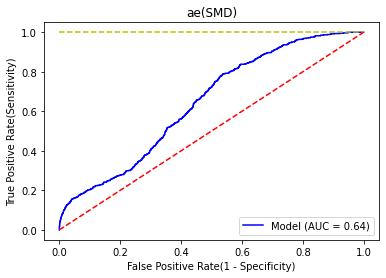

In [21]:
plt.title('ae(' + model_name + ')')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.savefig('./graph/ae_' + model_name + '.png', dpi=300)
plt.show()